#HW1 - Data Exploration and Preparation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading the dataset

In [ ]:
!rm *.csv
from google.colab import files
print("Please load the raw csv data")
uploadedData = files.upload()
filename = list(uploadedData)[0]

Please load the raw csv data


Saving virus_data.csv to virus_data.csv


In [ ]:
dataset = pd.read_csv(filename)

In [ ]:
dataset.shape

(1250, 26)

# Part 1: Data Loading and First Look

In [ ]:
#Q1
dataset.shape

(1250, 26)

In [ ]:
#Q2
dataset['conversations_per_day'].value_counts()

1     232
2     213
3     191
4     158
5     127
0     117
6      69
7      46
8      34
9      21
10     20
12      7
11      5
13      4
15      3
14      2
16      1
Name: conversations_per_day, dtype: int64

In [ ]:
#Q3 Descriptions are in the report
dataset.columns

Index(['patient_id', 'age', 'sex', 'weight', 'blood_type', 'current_location',
       'num_of_siblings', 'happiness_score', 'household_income',
       'conversations_per_day', 'sugar_levels', 'sport_activity', 'symptoms',
       'pcr_date', 'PCR_01', 'PCR_02', 'PCR_03', 'PCR_04', 'PCR_05', 'PCR_06',
       'PCR_07', 'PCR_08', 'PCR_09', 'PCR_10', 'spread', 'risk'],
      dtype='object')

In [ ]:
#Q4
from sklearn.model_selection import train_test_split

Hani_Last2IdDigits = 57
Naser_Last2IdDigits = 30 
our_random_state = Hani_Last2IdDigits + Naser_Last2IdDigits

trainset, testset = train_test_split(dataset, train_size=0.8, random_state = our_random_state)
print(trainset.shape)
print(testset.shape)

(1000, 26)
(250, 26)


In [ ]:
#Q5
# Compute correlation
print("Correlation between spread and PCR_01 is: {:.3f}".format(trainset.corr(numeric_only=True).spread.PCR_01))
print("Correlation between spread and PCR_02 is: {:.3f}".format(trainset.corr(numeric_only=True).spread.PCR_02))
print("Correlation between spread and PCR_09 is: {:.3f}".format(trainset.corr(numeric_only=True).spread.PCR_09))


Correlation between spread and PCR_01 is: 0.080
Correlation between spread and PCR_02 is: -0.028
Correlation between spread and PCR_09 is: 0.523


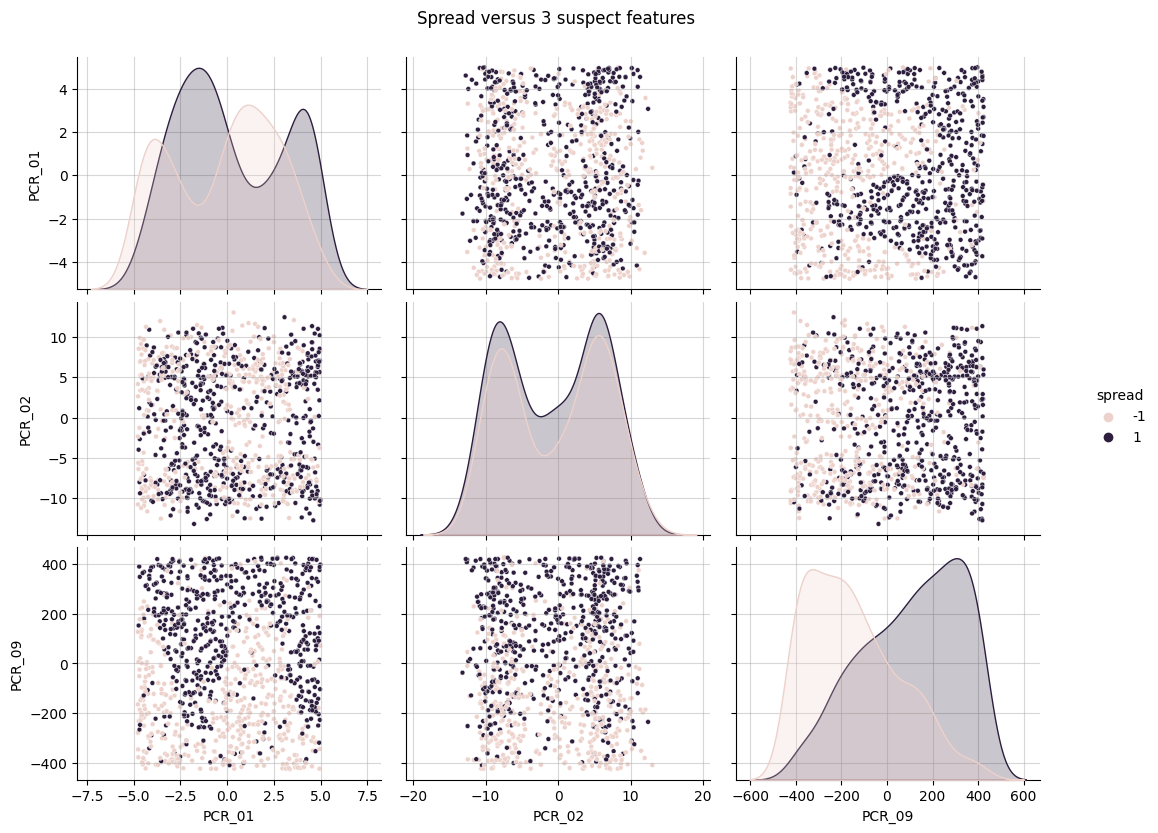

In [ ]:
#Q6
g=sns.pairplot(trainset,hue="spread",x_vars=["PCR_01","PCR_02","PCR_09"],y_vars=["PCR_01","PCR_02","PCR_09"], plot_kws={"s": 12})
g.fig.suptitle("Spread versus 3 suspect features", y=1.04)
for ax in np.ravel(g.axes):
 ax.grid(alpha=0.5)
g.fig.set_size_inches(12,8)

In [ ]:
#kNN implementation 

from scipy.spatial import distance
from sklearn.base import BaseEstimator,ClassifierMixin
def get_label(label):
  return np.sign(np.sum(label))

class kNN(BaseEstimator, ClassifierMixin):
    def __init__(self, n_neighbors:int = 3):
      self.n_neighbors = n_neighbors
      self.data=None
      self.labels=None
      
    def fit(self, X, y):
      self.data = np.copy(X)
      self.labels = np.copy(y)
      return self

    def predict(self, X):
      # Note: You can use self.n_neighbors here
      predictions = None
      if self.data is not None and self.labels is not None:
        dist= distance.cdist(X,self.data ,'euclidean')
        k_near=np.argpartition(dist, self.n_neighbors,axis=1)[:,:self.n_neighbors]
        k_near_labels=self.labels[k_near]
        predictions=np.apply_along_axis(get_label,axis=1,arr=k_near_labels)
       
      return predictions

      

In [ ]:

def visualize_clf(clf, X, Y, title, 
                  xlabel, ylabel,
                  marker_size=50,
                  grid_length=300,
                  linewidths=None):
    import matplotlib.pyplot as plt
    import pandas as pd
    from matplotlib.colors import ListedColormap
    
    if isinstance(X, pd.DataFrame):
        X = X.to_numpy()
        
    # For internal use here, make sure labels are 0 and 1
    Y = np.ravel(Y).astype(int)
    labels = set(Y)
    assert len(labels) == 2, "Can only visualize two unique labels"

    if labels == set([-1,1]):
      Y = (Y + 1) // 2
      labels = set(Y)
    
    assert labels == set([0,1]), "Could not handle given labels"

    plt.figure(figsize=(8, 8))

    # Parameters
    n_classes = 2
    markers = ["D", "o"]
    palette = sns.color_palette("hls", 2)
    custom_cmap = ListedColormap(palette.as_hex())

    x_delta = np.abs(X[:, 0].max() - X[:, 0].min()) * 0.1
    y_delta = np.abs(X[:, 1].max() - X[:, 1].min()) * 0.1
    x_min, x_max = X[:, 0].min() - x_delta, X[:, 0].max() + x_delta
    y_min, y_max = X[:, 1].min() - y_delta, X[:, 1].max() + y_delta
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_length),
                         np.linspace(y_min, y_max, grid_length))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cs = plt.contourf(xx, yy, Z, cmap=custom_cmap, alpha=0.35)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.75)

    # Plot the training points
    for i, color, marker in zip(labels, palette, markers):
        idx = np.where(Y == i)
        plt.scatter(X[idx, 0], X[idx, 1], color=color,
                    marker=marker,
                    edgecolor='white', s=marker_size,
                    linewidths=linewidths)

    plt.title(title, fontsize=20)
    plt.axis("tight")
    plt.show()


knn 1 not normalized Q7
accuracy on training set: 1.0


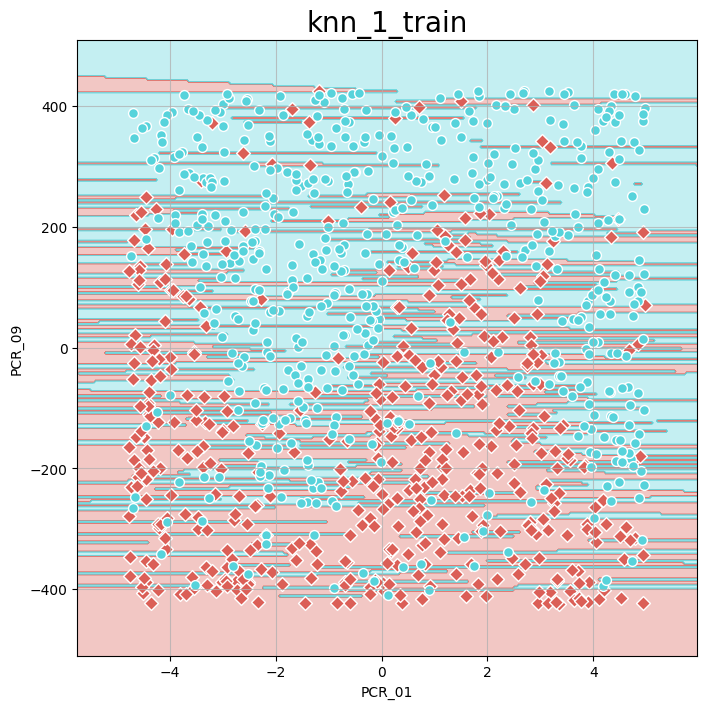

accuracy on test set: 0.716
knn 1 test not normalized Q7


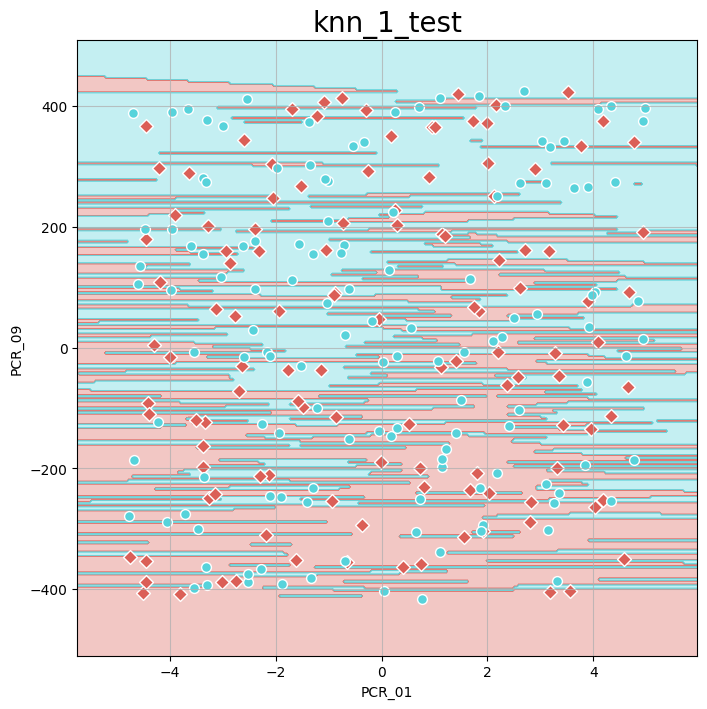

In [ ]:
#implementation test

from sklearn.metrics import accuracy_score
obj=kNN()
obj.n_neighbors=1
obj.fit(trainset[['PCR_01','PCR_09']],trainset['spread'])
to_clf=trainset[['PCR_01','PCR_09']].copy()

#train
print("knn 1 not normalized Q7")
print("accuracy on training set:" , obj.score(trainset[['PCR_01','PCR_09']],trainset['spread']))
visualize_clf(obj,to_clf,trainset['spread'],"knn_1_train","PCR_01","PCR_09")

#test
print("accuracy on test set:", obj.score(testset[['PCR_01','PCR_09']],testset['spread']))
print("knn 1 test not normalized Q7")
visualize_clf(obj,to_clf,testset['spread'],"knn_1_test","PCR_01","PCR_09")

knn 1 not normalized Q7 (13, 2) (13,)
accuracy on training set: 1.0


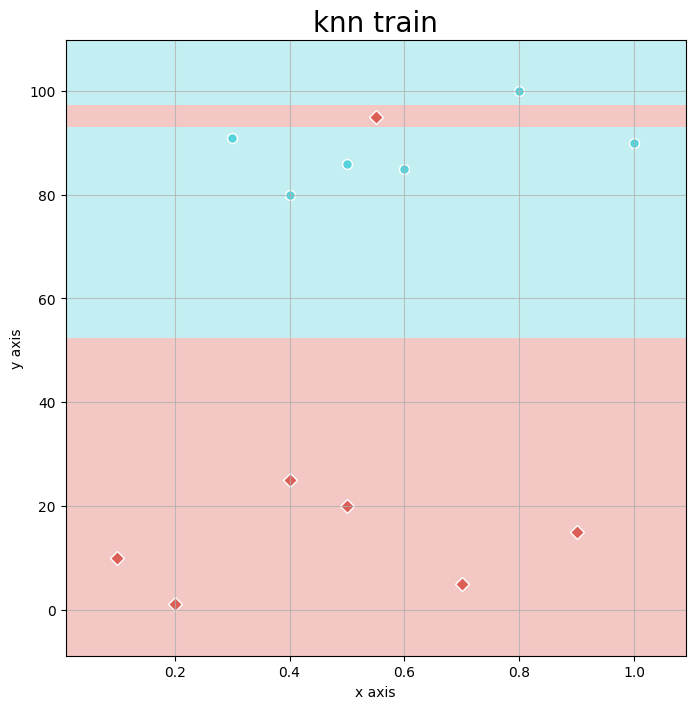

knn 1 normalized Q9
accuracy on training set: 1.0


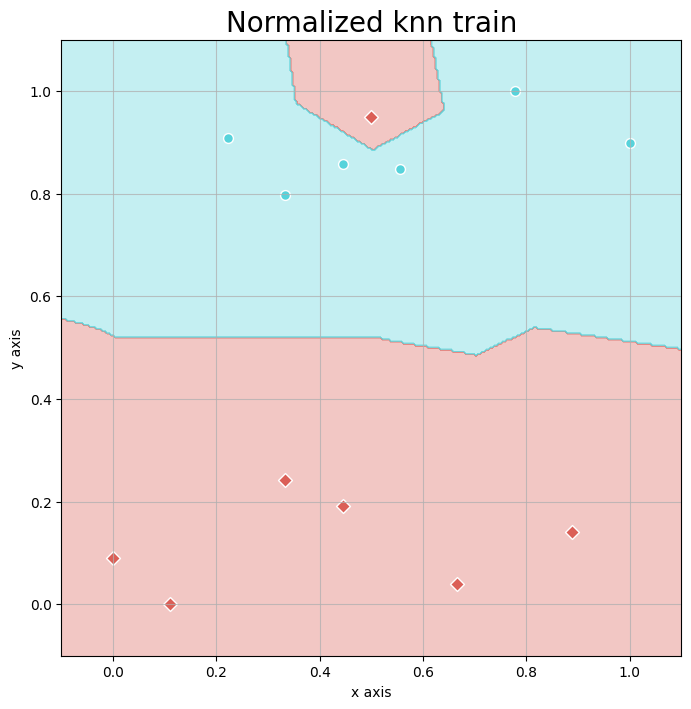

In [ ]:
#HANI - Q9 example graph (e stands for example)
e_x_axis = [0.1, 0.2, 0.4, 0.5, 0.7, 0.9, 0.3, 0.4, 0.5, 0.6, 0.8, 1, 0.55]
e_y_axis = [10, 1, 25, 20, 5, 15, 91, 80, 86, 85, 100, 90, 95]
e_trainset = pd.DataFrame(zip(e_x_axis, e_y_axis), columns=['x', 'y'])
e_labels = pd.Series([0,0,0,0,0,0,1,1,1,1,1,1, 0])


# Without normalization
e_obj=kNN()
e_obj.n_neighbors=1
e_obj.fit(e_trainset, e_labels)
e_to_clf=e_trainset.copy()

#train
print("knn 1 not normalized Q7", e_trainset.shape, e_labels.shape)
print("accuracy on training set:" , e_obj.score(e_trainset, e_labels))
visualize_clf(e_obj, e_to_clf, e_labels, "knn train", "x axis", "y axis")


# With normalization
e_norm_obj=kNN()
e_norm_obj.n_neighbors=1
e_knn_train = e_trainset.copy()
e_norm_df=(e_knn_train-e_knn_train.min())/(e_knn_train.max()-e_knn_train.min())

# knn_test=testset[['PCR_01','PCR_09']].copy()
# norm_test=(knn_test-knn_test.min())/(knn_test.max()-knn_test.min())

e_norm_obj.fit(e_norm_df, e_labels)

#train
print("knn 1 normalized Q9")
print("accuracy on training set:" ,e_norm_obj.score(e_norm_df,e_labels))
visualize_clf(e_norm_obj,e_norm_df,e_labels,"Normalized knn train","x axis","y axis")


In [ ]:
#data normaliztation

from sklearn import preprocessing

normalized_arr1=preprocessing.normalize([trainset['PCR_01']])
normalized_arr2=preprocessing.normalize([trainset['PCR_09']])

knn 1 normalized Q9
accuracy on training set: 1.0


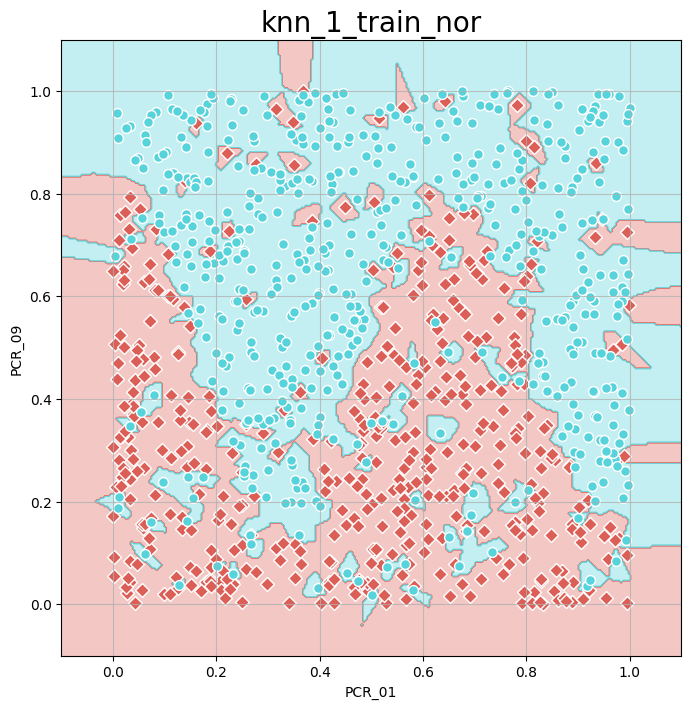

knn 1 test normalized Q9
accuracy on test set: 0.784


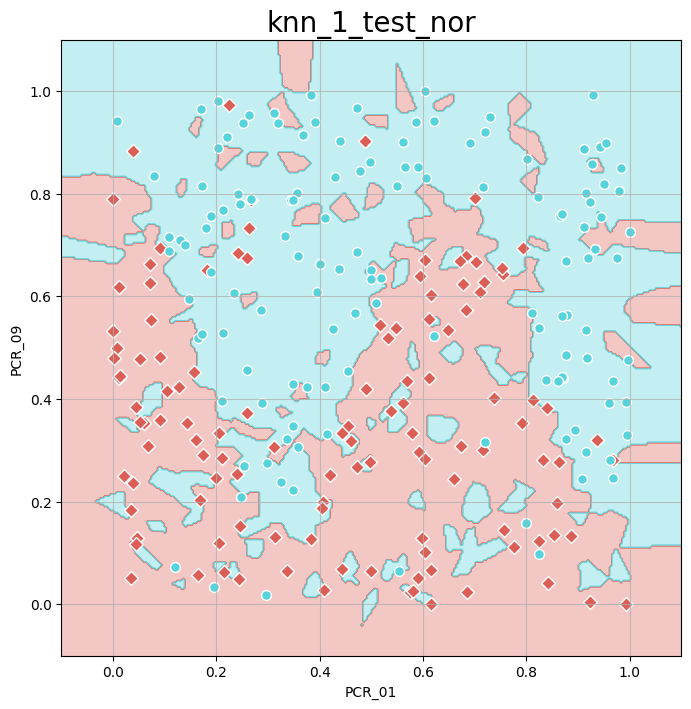

In [ ]:
norm_obj=kNN()
norm_obj.n_neighbors=1
knn_train=trainset[['PCR_01','PCR_09']].copy()
norm_df=(knn_train-knn_train.min())/(knn_train.max()-knn_train.min())

knn_test=testset[['PCR_01','PCR_09']].copy()
norm_test=(knn_test-knn_test.min())/(knn_test.max()-knn_test.min())

norm_obj.fit(norm_df, trainset['spread'])


#train
print("knn 1 normalized Q9")
print("accuracy on training set:" ,norm_obj.score(norm_df,trainset['spread']))
visualize_clf(norm_obj,norm_df,trainset['spread'],"knn_1_train_nor","PCR_01","PCR_09")
#test
print("knn 1 test normalized Q9")
print("accuracy on test set:" ,norm_obj.score(norm_test,testset['spread']))
visualize_clf(norm_obj,norm_test,testset['spread'],"knn_1_test_nor","PCR_01","PCR_09")

knn 7 normalized Q10
accuracy on training set: 0.882


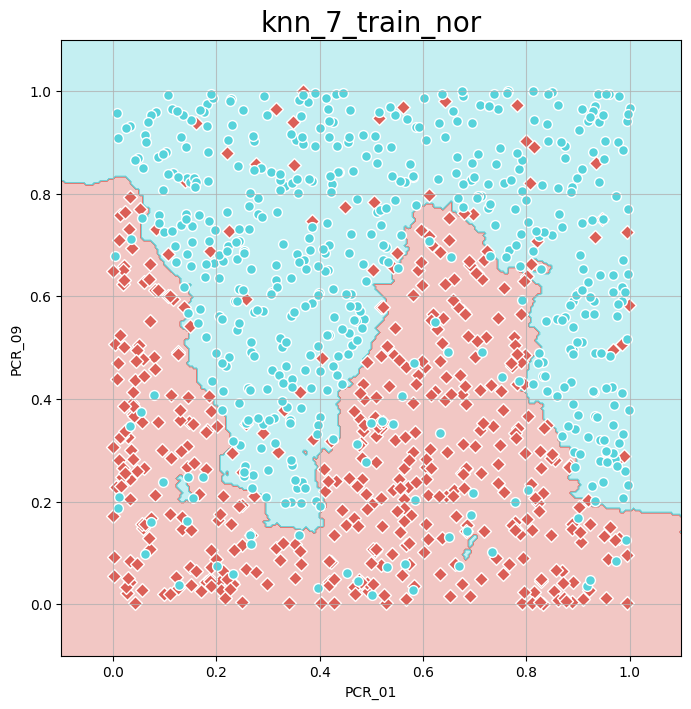

knn 7 normalized Q10
accuracy on test set: 0.872


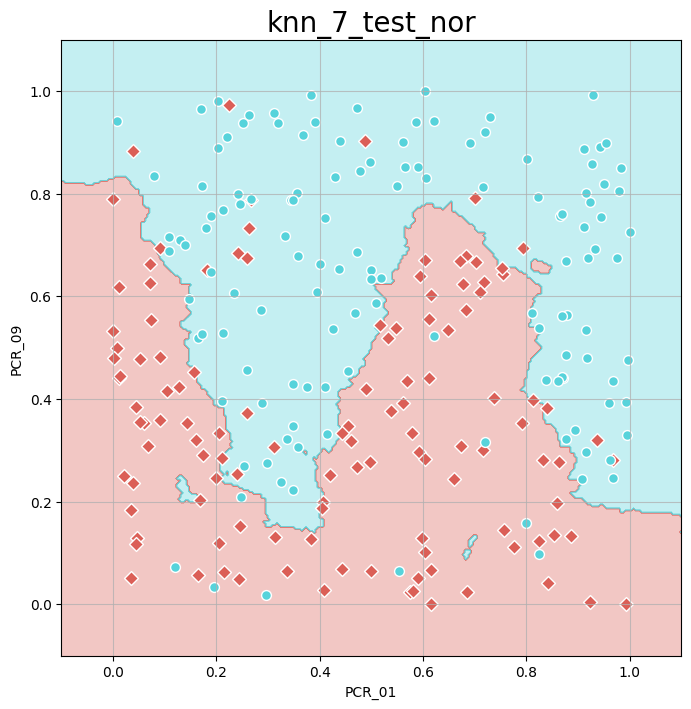

In [ ]:
knn_7=kNN()
knn_7.n_neighbors=7
knn_7.fit(norm_df, trainset['spread'])

print("knn 7 normalized Q10")
print("accuracy on training set:" ,knn_7.score(norm_df,trainset['spread']))
visualize_clf(knn_7,norm_df,trainset['spread'],"knn_7_train_nor","PCR_01","PCR_09")


print("knn 7 normalized Q10")
print("accuracy on test set:" ,knn_7.score(norm_test,testset['spread']))
visualize_clf(knn_7,norm_test,testset['spread'],"knn_7_test_nor","PCR_01","PCR_09")



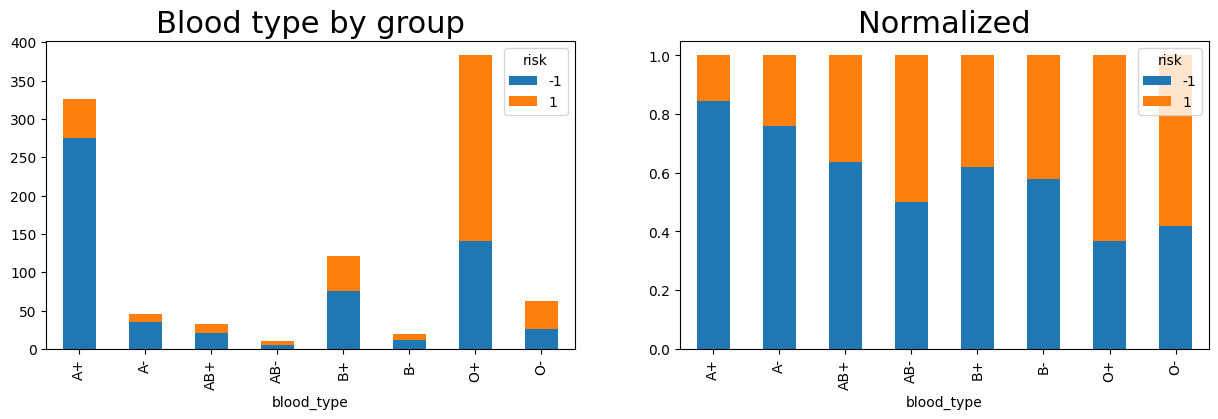

In [ ]:
#Q13
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(15,4))
ax1.grid(alpha=0.5)
ax2.grid(alpha=0.5)
ax1.set_title("Blood type by group", fontsize=22)
ax2.set_title("Normalized", fontsize=22)
_ = pd.crosstab(trainset['blood_type'], trainset['risk']).plot(kind='bar', stacked=True, ax=ax1)
_ = pd.crosstab(trainset['blood_type'], trainset['risk'], normalize="index").plot(kind='bar', stacked=True, ax=ax2)


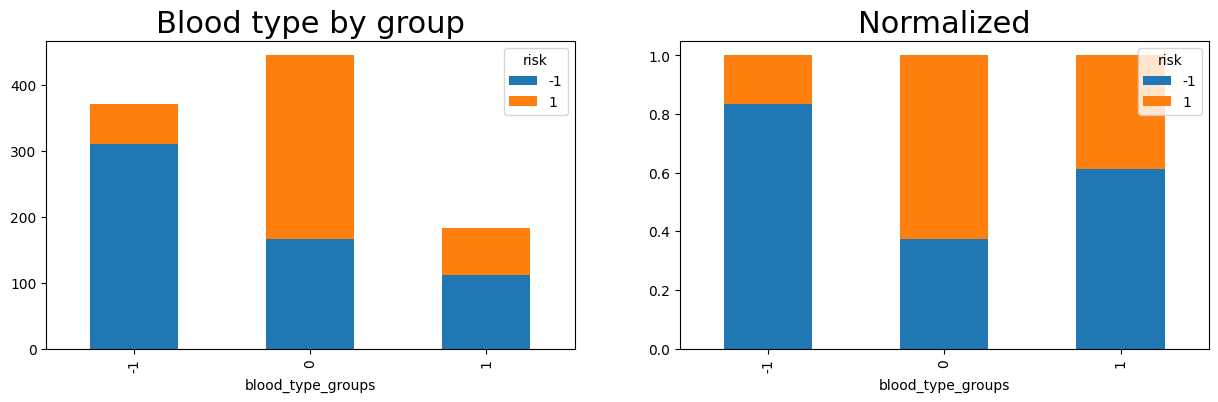

In [ ]:
#replace features
blood_type_groups=[]
trainByBlood=trainset['blood_type'].values
for i in range(len(trainset)):
  if trainByBlood[i]=='A+' or trainByBlood[i]=='A-':
    blood_type_groups.append(-1)
  elif trainByBlood[i]=='O+' or trainByBlood[i]=='O-':
    blood_type_groups.append(0)
  elif trainByBlood[i]=='B+' or trainByBlood[i]=='B-' or trainByBlood[i]=='AB+' or trainByBlood[i]=='AB-':
    blood_type_groups.append(1)

trainset['blood_type_groups']=blood_type_groups
trainset.drop("blood_type", axis=1,inplace=True)

fig, (ax3, ax4) = plt.subplots(ncols=2, sharey=False, figsize=(15,4))
ax3.grid(alpha=0.5)
ax4.grid(alpha=0.5)
ax3.set_title("Blood type by group", fontsize=22)
ax4.set_title("Normalized", fontsize=22)
_ = pd.crosstab(trainset['blood_type_groups'], trainset['risk']).plot(kind='bar', stacked=True, ax=ax3)
_ = pd.crosstab(trainset['blood_type_groups'], trainset['risk'], normalize="index").plot(kind='bar', stacked=True, ax=ax4)


In [ ]:


# Q14
sore_throat=[]
fever=[]
smell_loss=[]
cough=[]
shortness_of_breath=[]
arr= trainset['symptoms'].values.astype(str)

for i in range(1000):
  if arr[i].__contains__('sore_throat'):
    sore_throat.append(1)
  else:
    sore_throat.append(0)
  if arr[i].__contains__('fever'):
    fever.append(1)
  else:
    fever.append(0)
  if arr[i].__contains__('smell_loss'):
    smell_loss.append(1)
  else:
    smell_loss.append(0)
  if arr[i].__contains__('cough'):
    cough.append(1)
  else:
    cough.append(0)
  if arr[i].__contains__('shortness_of_breath'):
    shortness_of_breath.append(1)
  else:
    shortness_of_breath.append(0)

trainset['sore_throat']=sore_throat
trainset['fever']=fever
trainset['smell_loss']=smell_loss
trainset['cough']=cough
trainset['shortness_of_breath']=shortness_of_breath
trainset.drop('symptoms',inplace=True,axis=1)
print(trainset.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 815 to 333
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   patient_id             1000 non-null   int64  
 1   age                    1000 non-null   int64  
 2   sex                    1000 non-null   object 
 3   weight                 1000 non-null   float64
 4   current_location       1000 non-null   object 
 5   num_of_siblings        1000 non-null   int64  
 6   happiness_score        1000 non-null   int64  
 7   household_income       1000 non-null   float64
 8   conversations_per_day  1000 non-null   int64  
 9   sugar_levels           1000 non-null   int64  
 10  sport_activity         1000 non-null   int64  
 11  pcr_date               1000 non-null   object 
 12  PCR_01                 1000 non-null   float64
 13  PCR_02                 1000 non-null   float64
 14  PCR_03                 1000 non-null   float64
 15  PCR

In [ ]:
# Q14
# Transform all columns into numerical values
trainset.loc[trainset["sex"] == "M", "sex"] = 1
trainset.loc[trainset["sex"] == "F", "sex"] = -1


pcr_days=[]
newdatetrain=trainset['pcr_date'].values
for i in range(len(trainset)):
    year, month , day = map(int, newdatetrain[i].split('-'))
    pcr_days.append(day + 30*month+(year-2019)*365)
    array_tmp=np.array(pcr_days)
# array_tmp=array_tmp.reshape(-1,1)
trainset=trainset.assign(normalized_pcr_date=preprocessing.MinMaxScaler().fit_transform(array_tmp.reshape(-1,1)))
trainset.drop('pcr_date',inplace=True, axis=1)

KeyError: ignored

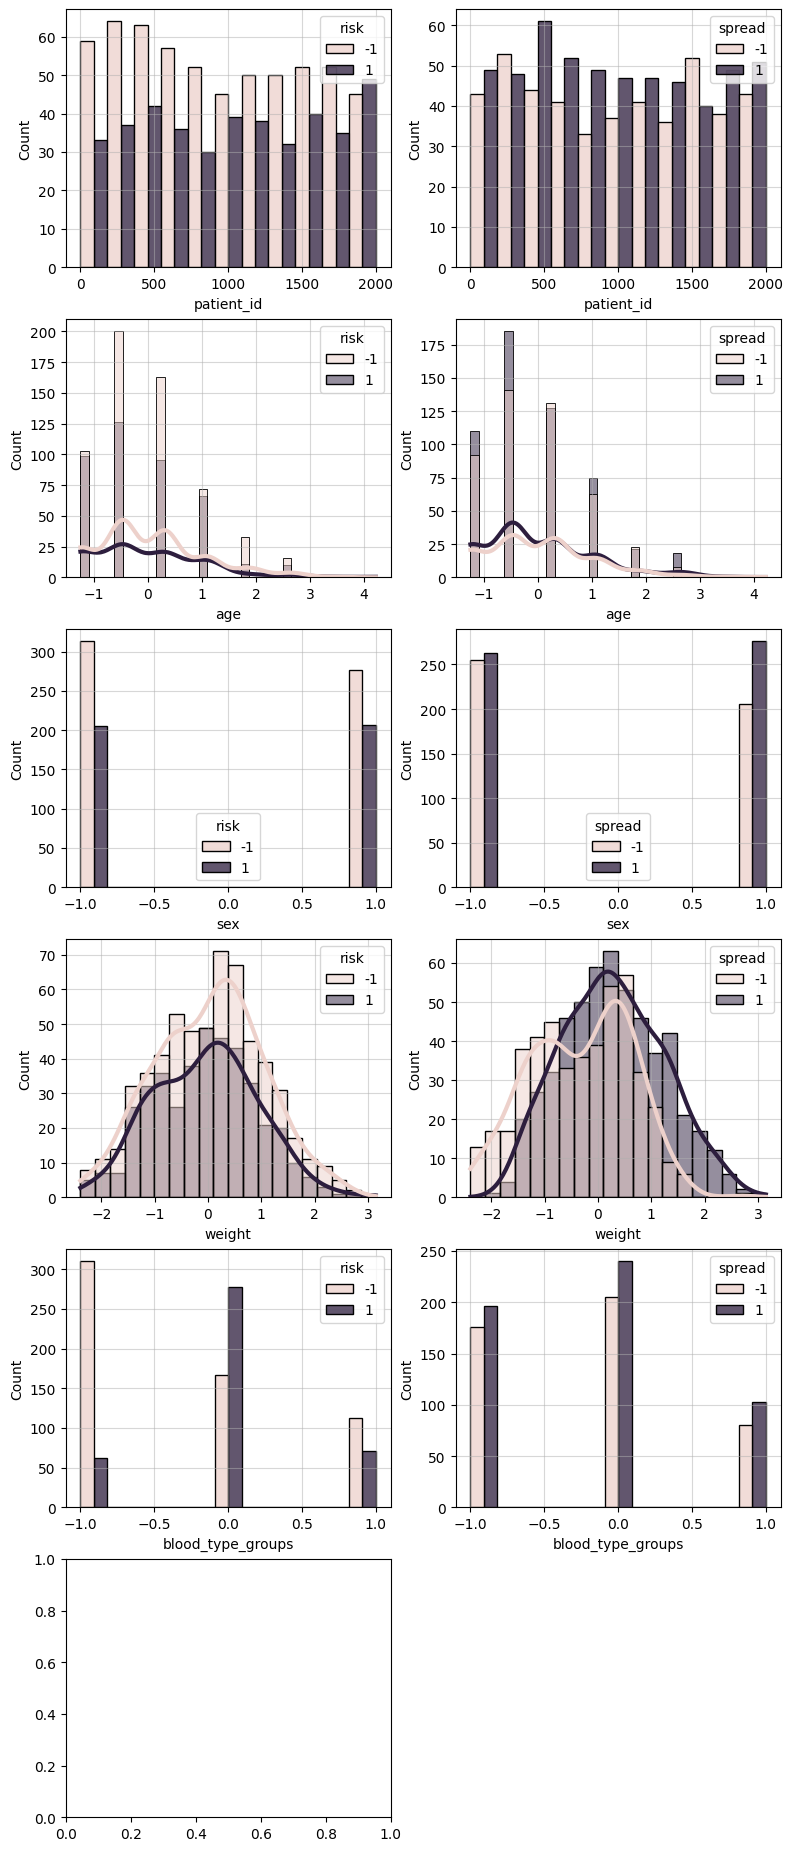

In [43]:
# Make 2 histograms for each feature
COL_NAME = ['patient_id', 'age', 'sex', 'weight', 'blood_type_groups',
       'num_of_siblings', 'happiness_score', 'household_income',
       'conversations_per_day', 'sugar_levels', 'sport_activity', 'fever','cough','smell_loss','shortness_of_breath','sore_throat',
        'PCR_01', 'PCR_02', 'PCR_03', 'PCR_04', 'PCR_05', 'PCR_06',
       'PCR_07', 'PCR_08', 'PCR_09', 'PCR_10']
COLS, ROWS = (26, len(COL_NAME))
plt.figure(figsize=(5 * COLS, 4 * ROWS))
for row in range(ROWS):
  column = COL_NAME[row]
  for j, cls in enumerate(["risk", "spread"]):
    plt.subplot(ROWS,COLS, row * COLS + 1 + j)

    isContinuous = "float" in trainset[column].dtype.name
    sns.histplot(data=trainset, x=column, hue=cls, line_kws={"linewidth": 3},
    kde=isContinuous, multiple="layer" if isContinuous else "dodge")
    plt.grid(alpha=0.5)
plt.tight_layout()

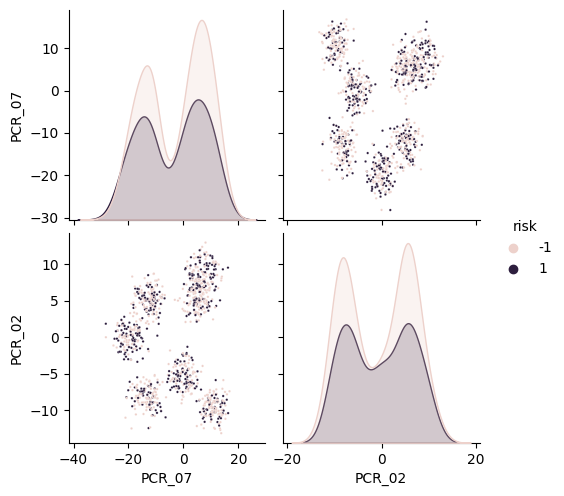

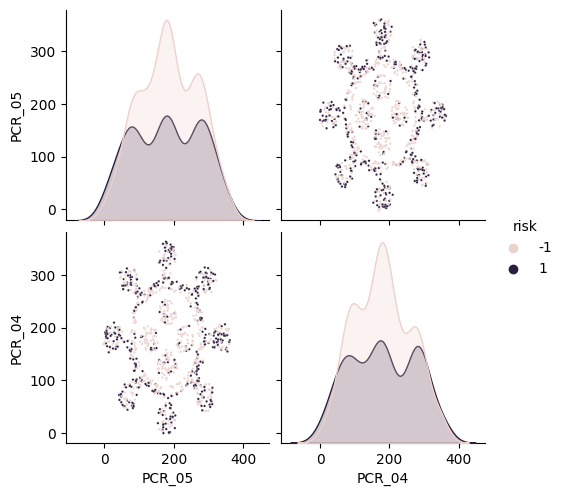

In [ ]:
#sns.pairplot(trainset[trainset.filter(like='PCR').columns.tolist() + ["risk"]],
# plot_kws={"s": 3}, hue="risk")
sns.pairplot(trainset[['PCR_07','PCR_02','risk']], plot_kws={"s": 3}, hue="risk")
sns.pairplot(trainset[['PCR_05','PCR_04','risk']], plot_kws={"s": 3}, hue="risk")

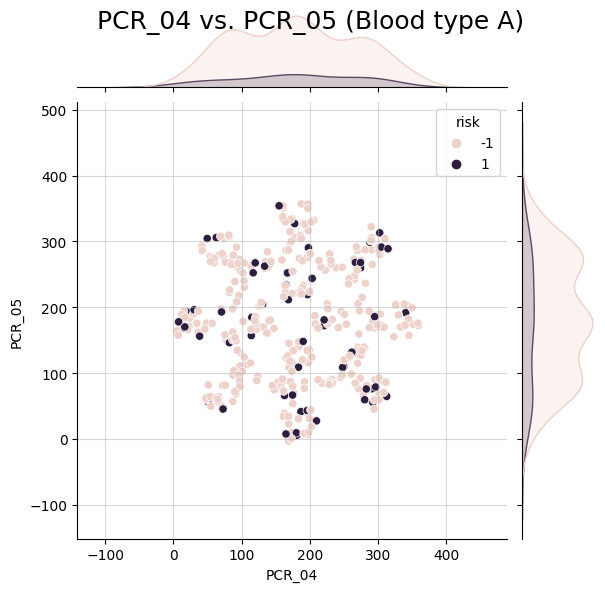

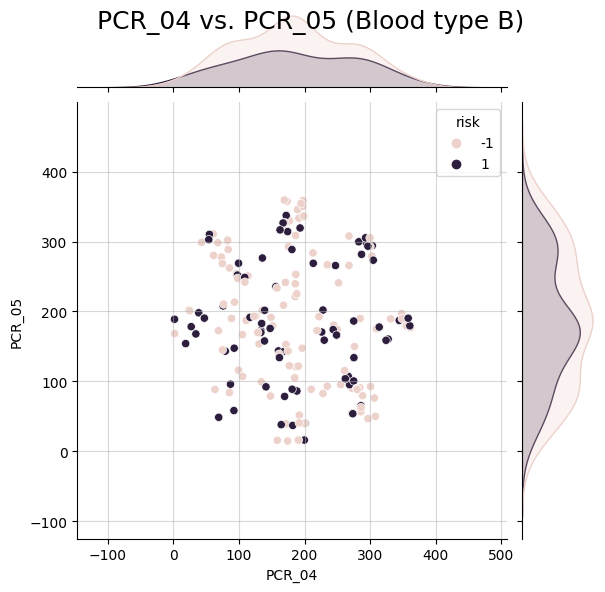

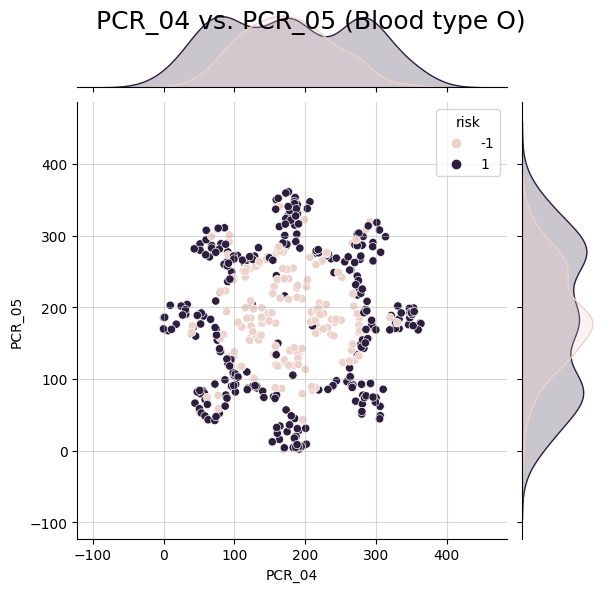

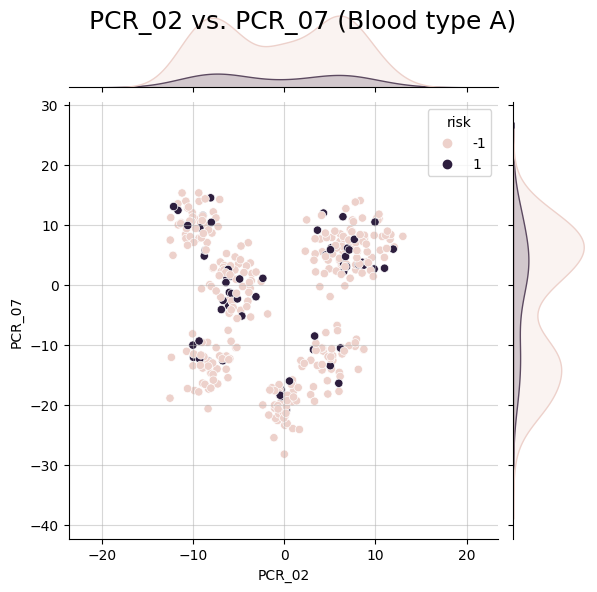

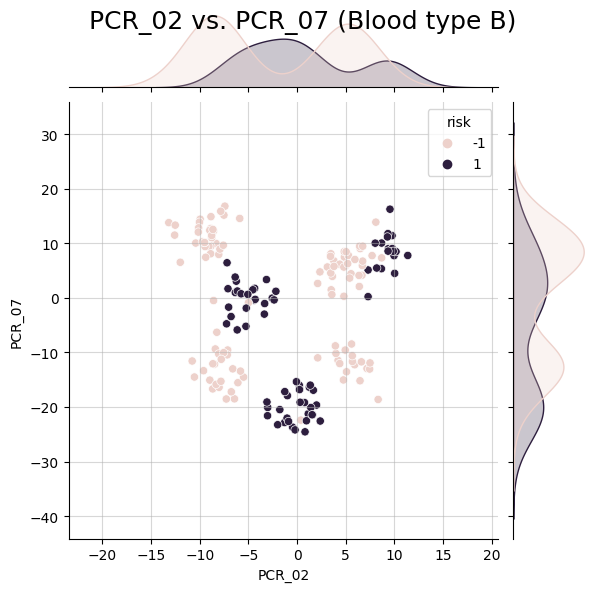

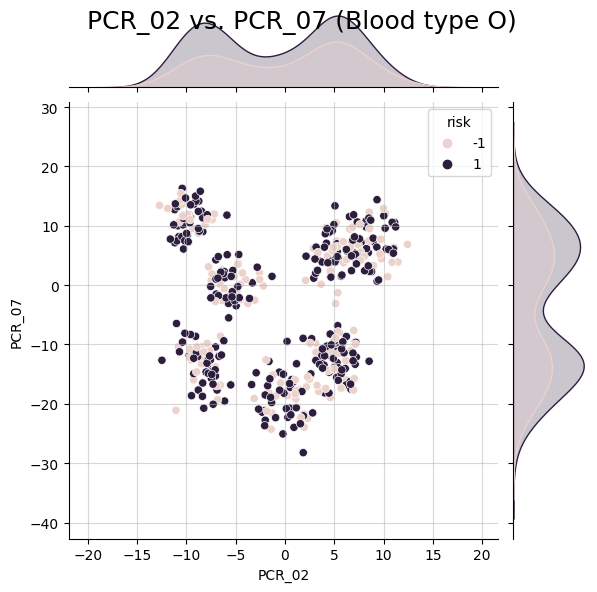

In [ ]:
p=sns.jointplot(data=trainset[trainset['blood_type_groups']==-1], x="PCR_04", y="PCR_05",hue='risk')
p.fig.suptitle("PCR_04 vs. PCR_05 (Blood type A)", fontsize=18)
_ = p.ax_joint.grid(alpha=0.5)
p=sns.jointplot(data=trainset[trainset['blood_type_groups']==1], x="PCR_04", y="PCR_05",hue='risk')
p.fig.suptitle("PCR_04 vs. PCR_05 (Blood type B)", fontsize=18)
_ = p.ax_joint.grid(alpha=0.5)
p=sns.jointplot(data=trainset[trainset['blood_type_groups']==0], x="PCR_04", y="PCR_05",hue='risk')
p.fig.suptitle("PCR_04 vs. PCR_05 (Blood type O)", fontsize=18)
_ = p.ax_joint.grid(alpha=0.5)

p=sns.jointplot(data=trainset[trainset['blood_type_groups']==-1], x="PCR_02", y="PCR_07",hue='risk')
p.fig.suptitle("PCR_02 vs. PCR_07 (Blood type A)", fontsize=18)
_ = p.ax_joint.grid(alpha=0.5)
p=sns.jointplot(data=trainset[trainset['blood_type_groups']==1], x="PCR_02", y="PCR_07",hue='risk')
p.fig.suptitle("PCR_02 vs. PCR_07 (Blood type B)", fontsize=18)
_ = p.ax_joint.grid(alpha=0.5)
p=sns.jointplot(data=trainset[trainset['blood_type_groups']==0], x="PCR_02", y="PCR_07",hue='risk')
p.fig.suptitle("PCR_02 vs. PCR_07 (Blood type O)", fontsize=18)
_ = p.ax_joint.grid(alpha=0.5)

In [42]:
#Q20

scaler = preprocessing.MinMaxScaler()

#trainset.drop('current_location',inplace=True, axis=1)
train1=trainset.copy()
scaler = preprocessing.StandardScaler()
newrray=np.copy(trainset['weight'])
trainset.drop('weight',inplace=True, axis=1)
newrray=newrray.reshape(-1,1)
trainset=trainset.assign(weight=scaler.fit_transform(newrray))

newrray=np.copy(trainset['PCR_01'])
trainset.drop('PCR_01',inplace=True, axis=1)
newrray=newrray.reshape(-1,1)
trainset=trainset.assign(PCR_01=scaler.fit_transform(newrray))

newrray=np.copy(trainset['PCR_02'])
trainset.drop('PCR_02',inplace=True, axis=1)
newrray=newrray.reshape(-1,1)
trainset=trainset.assign(PCR_02=scaler.fit_transform(newrray))

newrray=np.copy(trainset['PCR_03'])
trainset.drop('PCR_03',inplace=True, axis=1)
newrray=newrray.reshape(-1,1)
trainset=trainset.assign(PCR_03=scaler.fit_transform(newrray))

newrray=np.copy(trainset['PCR_04'])
trainset.drop('PCR_04',inplace=True, axis=1)
newrray=newrray.reshape(-1,1)
trainset=trainset.assign(PCR_04=scaler.fit_transform(newrray))

newrray=np.copy(trainset['PCR_05'])
trainset.drop('PCR_05',inplace=True, axis=1)
newrray=newrray.reshape(-1,1)
trainset=trainset.assign(PCR_05=scaler.fit_transform(newrray))

newrray=np.copy(trainset['PCR_06'])
trainset.drop('PCR_06',inplace=True, axis=1)
newrray=newrray.reshape(-1,1)
trainset=trainset.assign(PCR_06=scaler.fit_transform(newrray))

newrray=np.copy(trainset['PCR_07'])
trainset.drop('PCR_07',inplace=True, axis=1)
newrray=newrray.reshape(-1,1)
trainset=trainset.assign(PCR_07=scaler.fit_transform(newrray))

newrray=np.copy(trainset['PCR_08'])
trainset.drop('PCR_08',inplace=True, axis=1)
newrray=newrray.reshape(-1,1)
trainset=trainset.assign(PCR_08=scaler.fit_transform(newrray))

newrray=np.copy(trainset['PCR_09'])
trainset.drop('PCR_09',inplace=True, axis=1)
newrray=newrray.reshape(-1,1)
trainset=trainset.assign(PCR_09=scaler.fit_transform(newrray))

newrray=np.copy(trainset['PCR_10'])
trainset.drop('PCR_10',inplace=True, axis=1)
newrray=newrray.reshape(-1,1)
trainset=trainset.assign(PCR_10=scaler.fit_transform(newrray))

newrray=np.copy(trainset['household_income'])
trainset.drop('household_income',inplace=True, axis=1)
newrray=newrray.reshape(-1,1)
trainset=trainset.assign(household_income=scaler.fit_transform(newrray))

newrray=np.copy(trainset['sport_activity'])
trainset.drop('sport_activity',inplace=True, axis=1)
newrray=newrray.reshape(-1,1)
trainset=trainset.assign(sport_activity=scaler.fit_transform(newrray))

newrray=np.copy(trainset['sugar_levels'])
trainset.drop('sugar_levels',inplace=True, axis=1)
newrray=newrray.reshape(-1,1)
trainset=trainset.assign(sugar_levels=scaler.fit_transform(newrray))

newrray=np.copy(trainset['conversations_per_day'])
trainset.drop('conversations_per_day',inplace=True, axis=1)
newrray=newrray.reshape(-1,1)
trainset=trainset.assign(conversations_per_day=scaler.fit_transform(newrray))

newrray=np.copy(trainset['happiness_score'])
trainset.drop('happiness_score',inplace=True, axis=1)
newrray=newrray.reshape(-1,1)
trainset=trainset.assign(happiness_score=scaler.fit_transform(newrray))

newrray=np.copy(trainset['age'])
trainset.drop('age',inplace=True, axis=1)
newrray=newrray.reshape(-1,1)
trainset=trainset.assign(age=scaler.fit_transform(newrray))



[Text(0.5, 1.0, 'age')]

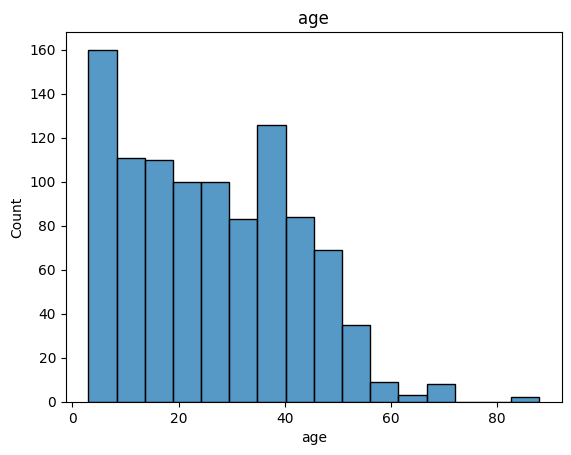

In [ ]:
sns.histplot(data=train1, x='age').set(title='age')


[Text(0.5, 1.0, 'age Normalized')]

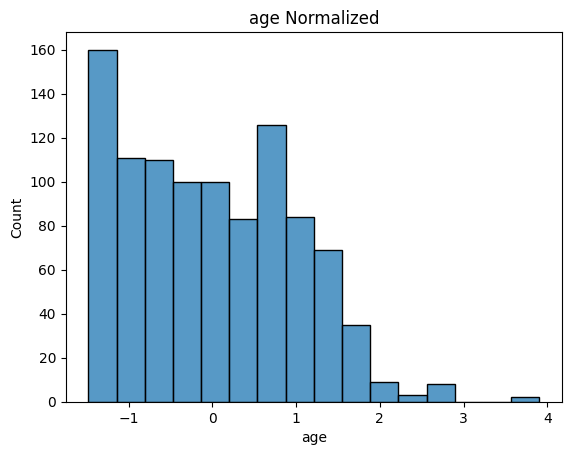

In [ ]:

sns.histplot(data=trainset, x='age').set(title='age Normalized')

In [ ]:

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
sfs = SequentialFeatureSelector(knn, n_features_to_select=3)
trainwithoutriskspread=trainset.copy()
trainwithoutriskspread.drop('risk',inplace=True, axis=1)
trainwithoutriskspread.drop('spread',inplace=True, axis=1)
sfs.fit(trainwithoutriskspread, trainset['spread'])
SequentialFeatureSelector(estimator=KNeighborsClassifier(n_neighbors=5),
                          n_features_to_select=3)
print(sfs.get_support())
print(trainwithoutriskspread.columns)


trainwithoutriskspread=train1.copy()
trainwithoutriskspread.drop('risk',inplace=True, axis=1)
trainwithoutriskspread.drop('spread',inplace=True, axis=1)
sfs.fit(trainwithoutriskspread, trainset['spread'])
SequentialFeatureSelector(estimator=KNeighborsClassifier(n_neighbors=5),
                          n_features_to_select=3)
print(sfs.get_support())
trainwithoutriskspread.columns

[False False False False False False False False False False  True  True
 False False False False False False False  True False False False False
 False False False]
Index(['patient_id', 'sex', 'num_of_siblings', 'blood_type_groups',
       'sore_throat', 'fever', 'smell_loss', 'cough', 'shortness_of_breath',
       'normalized_pcr_date', 'weight', 'PCR_01', 'PCR_02', 'PCR_03', 'PCR_04',
       'PCR_05', 'PCR_06', 'PCR_07', 'PCR_08', 'PCR_09', 'PCR_10',
       'household_income', 'sport_activity', 'sugar_levels',
       'conversations_per_day', 'happiness_score', 'age'],
      dtype='object')
[False False False  True False False False False False False False False
 False False False False False  True  True False False False False False
 False False False]


Index(['patient_id', 'age', 'sex', 'weight', 'num_of_siblings',
       'happiness_score', 'household_income', 'conversations_per_day',
       'sugar_levels', 'sport_activity', 'PCR_01', 'PCR_02', 'PCR_03',
       'PCR_04', 'PCR_05', 'PCR_06', 'PCR_07', 'PCR_08', 'PCR_09', 'PCR_10',
       'blood_type_groups', 'sore_throat', 'fever', 'smell_loss', 'cough',
       'shortness_of_breath', 'normalized_pcr_date'],
      dtype='object')

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from google.colab import files
from scipy.spatial import distance
from sklearn.base import BaseEstimator,ClassifierMixin
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

def normalize(training_data, new_data):

  new_dataset=new_data.copy()
  blood_type_groups=[]
  trainByBlood=new_dataset['blood_type'].values
  for i in range(len(new_dataset)):
    if trainByBlood[i]=='A+' or trainByBlood[i]=='A-':
      blood_type_groups.append(-1)
    elif trainByBlood[i]=='O+' or trainByBlood[i]=='O-':
      blood_type_groups.append(0)
    elif trainByBlood[i]=='B+' or trainByBlood[i]=='B-' or trainByBlood[i]=='AB+' or trainByBlood[i]=='AB-':
      blood_type_groups.append(1)

  new_dataset['blood_type_groups']=blood_type_groups
  new_dataset.drop("blood_type", axis=1,inplace=True)
  sore_throat=[]
  fever=[]
  smell_loss=[]
  cough=[]
  shortness_of_breath=[]
  arr= new_dataset['symptoms'].values.astype(str)

  for i in range(len(new_dataset)):
    if arr[i].__contains__('sore_throat'):
      sore_throat.append(1)
    else:
      sore_throat.append(0)
    if arr[i].__contains__('fever'):
      fever.append(1)
    else:
      fever.append(0)
    if arr[i].__contains__('smell_loss'):
      smell_loss.append(1)
    else:
      smell_loss.append(0)
    if arr[i].__contains__('cough'):
      cough.append(1)
    else:
      cough.append(0)
    if arr[i].__contains__('shortness_of_breath'):
      shortness_of_breath.append(1)
    else:
      shortness_of_breath.append(0)

  new_dataset['sore_throat']=sore_throat
  new_dataset['fever']=fever
  new_dataset['smell_loss']=smell_loss
  new_dataset['cough']=cough
  new_dataset['shortness_of_breath']=shortness_of_breath
  new_dataset.drop('symptoms',inplace=True,axis=1)
  new_dataset.loc[new_dataset["sex"] == "M", "sex"] = 1
  new_dataset.loc[new_dataset["sex"] == "F", "sex"] = -1


  pcr_days=[]
  newdatetrain=new_dataset['pcr_date'].values
  for i in range(len(new_dataset)):
      year, month , day = map(int, newdatetrain[i].split('-'))
      pcr_days.append(day + 30*month+(year-2019)*365)
      array_tmp=np.array(pcr_days)
  # array_tmp=array_tmp.reshape(-1,1)
  new_dataset=new_dataset.assign(normalized_pcr_date=preprocessing.MinMaxScaler().fit_transform(array_tmp.reshape(-1,1)))
  new_dataset.drop('pcr_date',inplace=True, axis=1)
  
  scaler = preprocessing.StandardScaler()
  newrray=np.copy(new_dataset['weight'])
  new_dataset.drop('weight',inplace=True, axis=1)
  newrray=newrray.reshape(-1,1)
  new_dataset=new_dataset.assign(weight=scaler.fit_transform(newrray))

  newrray=np.copy(new_dataset['PCR_01'])
  new_dataset.drop('PCR_01',inplace=True, axis=1)
  newrray=newrray.reshape(-1,1)
  new_dataset=new_dataset.assign(PCR_01=scaler.fit_transform(newrray))

  newrray=np.copy(new_dataset['PCR_02'])
  new_dataset.drop('PCR_02',inplace=True, axis=1)
  newrray=newrray.reshape(-1,1)
  new_dataset=new_dataset.assign(PCR_02=scaler.fit_transform(newrray))

  newrray=np.copy(new_dataset['PCR_03'])
  new_dataset.drop('PCR_03',inplace=True, axis=1)
  newrray=newrray.reshape(-1,1)
  new_dataset=new_dataset.assign(PCR_03=scaler.fit_transform(newrray))

  newrray=np.copy(new_dataset['PCR_04'])
  new_dataset.drop('PCR_04',inplace=True, axis=1)
  newrray=newrray.reshape(-1,1)
  new_dataset=new_dataset.assign(PCR_04=scaler.fit_transform(newrray))

  newrray=np.copy(new_dataset['PCR_05'])
  new_dataset.drop('PCR_05',inplace=True, axis=1)
  newrray=newrray.reshape(-1,1)
  new_dataset=new_dataset.assign(PCR_05=scaler.fit_transform(newrray))

  newrray=np.copy(new_dataset['PCR_06'])
  new_dataset.drop('PCR_06',inplace=True, axis=1)
  newrray=newrray.reshape(-1,1)
  new_dataset=new_dataset.assign(PCR_06=scaler.fit_transform(newrray))

  newrray=np.copy(new_dataset['PCR_07'])
  new_dataset.drop('PCR_07',inplace=True, axis=1)
  newrray=newrray.reshape(-1,1)
  new_dataset=new_dataset.assign(PCR_07=scaler.fit_transform(newrray))

  newrray=np.copy(new_dataset['PCR_08'])
  new_dataset.drop('PCR_08',inplace=True, axis=1)
  newrray=newrray.reshape(-1,1)
  new_dataset=new_dataset.assign(PCR_08=scaler.fit_transform(newrray))

  newrray=np.copy(new_dataset['PCR_09'])
  new_dataset.drop('PCR_09',inplace=True, axis=1)
  newrray=newrray.reshape(-1,1)
  new_dataset=new_dataset.assign(PCR_09=scaler.fit_transform(newrray))

  newrray=np.copy(new_dataset['PCR_10'])
  new_dataset.drop('PCR_10',inplace=True, axis=1)
  newrray=newrray.reshape(-1,1)
  new_dataset=new_dataset.assign(PCR_10=scaler.fit_transform(newrray))

  newrray=np.copy(new_dataset['household_income'])
  new_dataset.drop('household_income',inplace=True, axis=1)
  newrray=newrray.reshape(-1,1)
  new_dataset=new_dataset.assign(household_income=scaler.fit_transform(newrray))

  newrray=np.copy(new_dataset['sport_activity'])
  new_dataset.drop('sport_activity',inplace=True, axis=1)
  newrray=newrray.reshape(-1,1)
  new_dataset=new_dataset.assign(sport_activity=scaler.fit_transform(newrray))

  newrray=np.copy(new_dataset['sugar_levels'])
  new_dataset.drop('sugar_levels',inplace=True, axis=1)
  newrray=newrray.reshape(-1,1)
  new_dataset=new_dataset.assign(sugar_levels=scaler.fit_transform(newrray))

  newrray=np.copy(new_dataset['conversations_per_day'])
  new_dataset.drop('conversations_per_day',inplace=True, axis=1)
  newrray=newrray.reshape(-1,1)
  new_dataset=new_dataset.assign(conversations_per_day=scaler.fit_transform(newrray))

  newrray=np.copy(new_dataset['happiness_score'])
  new_dataset.drop('happiness_score',inplace=True, axis=1)
  newrray=newrray.reshape(-1,1)
  new_dataset=new_dataset.assign(happiness_score=scaler.fit_transform(newrray))

  newrray=np.copy(new_dataset['age'])
  new_dataset.drop('age',inplace=True, axis=1)
  newrray=newrray.reshape(-1,1)
  new_dataset=new_dataset.assign(age=scaler.fit_transform(newrray))
  return new_dataset

In [47]:
def prepare_data(training_data, new_data):
  data = normalize(training_data, new_data)
  return data

In [48]:
df = pd.read_csv('virus_data.csv', sep=',', header=0)
train,test=train_test_split(df, test_size=0.2, random_state=57+30)
data_to_return=prepare_data(train,train)
np.savetxt('undropped_train.csv',data_to_return,header= "patient_id,age,num_of_siblings,spread,risk,O_type,B_type,A_type,cough,low_appetite,sore_throat,shortness_of_breath,fever,pcr_date_normal,sex,weight,PCR_01,PCR_02,PCR_03,PCR_04,PCR_05,PCR_06,PCR_07,PCR_08,PCR_09,PCR_10,household_income,sport_activity,sugar_levels,conversations_per_day,happiness_score",delimiter=",",fmt="%s")
data_to_return=prepare_data(train,test)
np.savetxt('undropped_test.csv',data_to_return,header= "patient_id,age,num_of_siblings,spread,risk,O_type,B_type,A_type,cough,low_appetite,sore_throat,shortness_of_breath,fever,pcr_date_normal,sex,weight,PCR_01,PCR_02,PCR_03,PCR_04,PCR_05,PCR_06,PCR_07,PCR_08,PCR_09,PCR_10,household_income,sport_activity,sugar_levels,conversations_per_day,happiness_score",delimiter=",",fmt="%s")
files.download("undropped_test.csv")
files.download("undropped_train.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# How to download from Colab?

In [ ]:
# from google.colab import files
# outputPath = "saved_file.csv"
# dataset.to_csv(outputPath)
# files.download(outputPath) 